<a href="https://colab.research.google.com/github/syaifulaliyup/Prak_Meet7_Komputer_Grafis/blob/main/VisualisasiData_LinearRegressi_G211230083.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [2]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

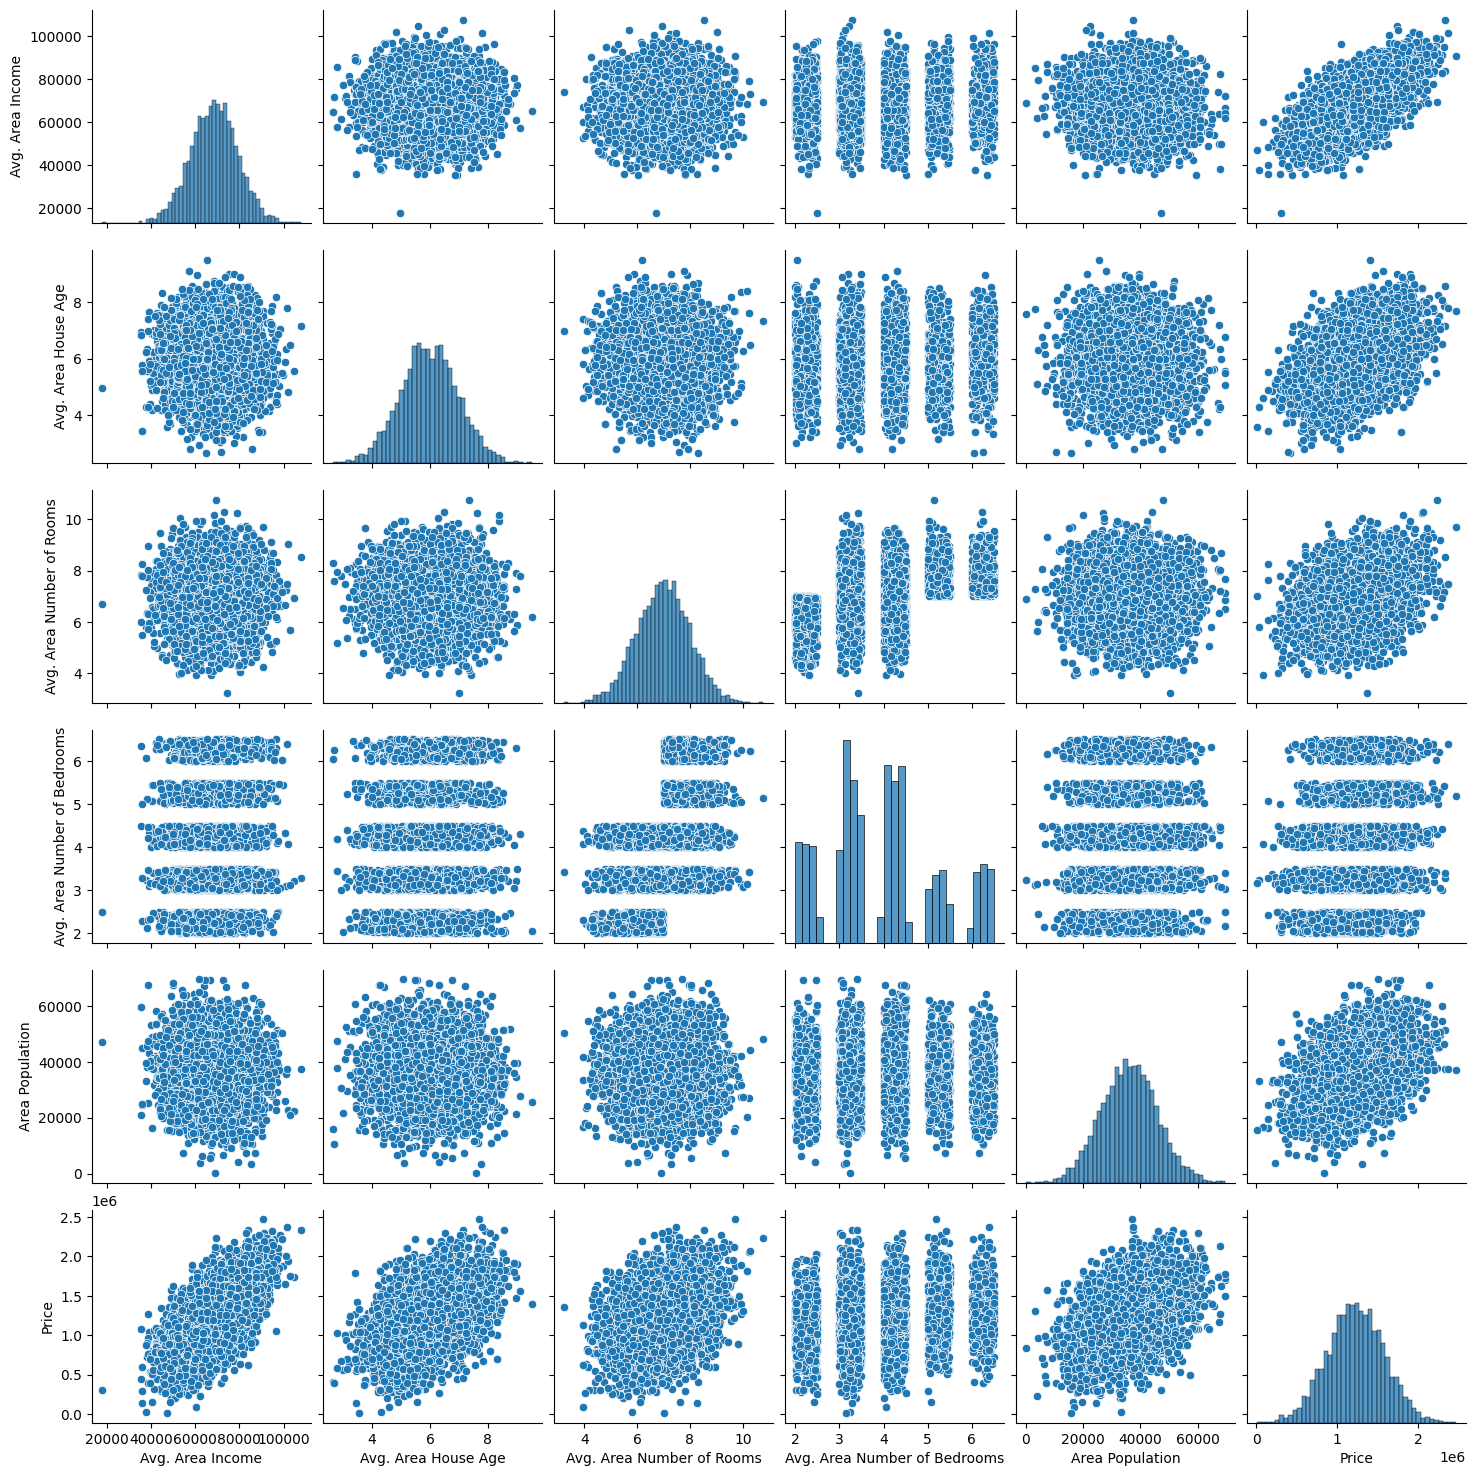

In [4]:
sns.pairplot(df)

<Axes: ylabel='Frequency'>

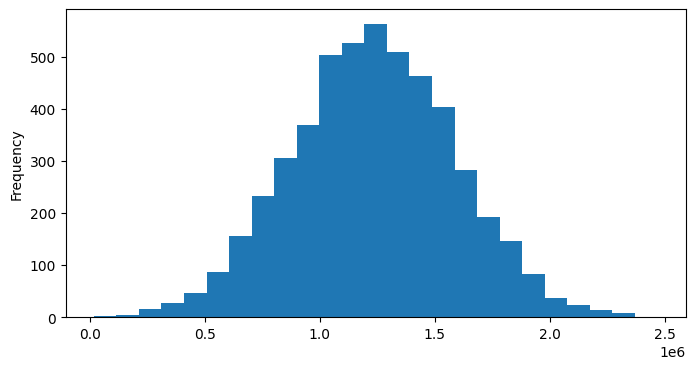

In [5]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

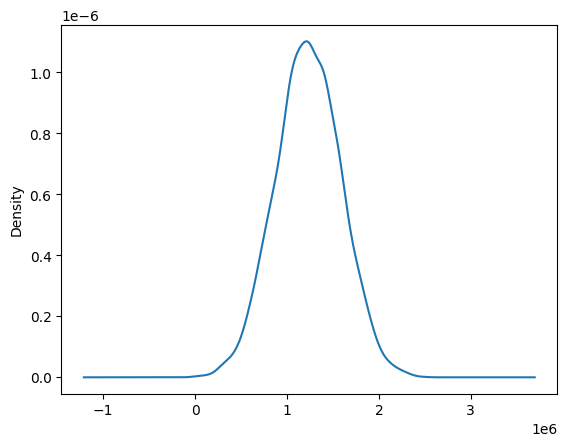

In [6]:
df['Price'].plot.density()

In [7]:
# Identifikasi kolom non-numerik
non_numeric_columns = df.select_dtypes(include=['object']).columns
# print(f"Kolom non-numerik: {non_numeric_columns}")

# Menghapus kolom non-numerik jika tidak relevan
df_numeric = df.drop(columns=non_numeric_columns)

# Menghitung korelasi dari kolom-kolom numerik
corr = df_numeric.corr()
print(corr)

                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

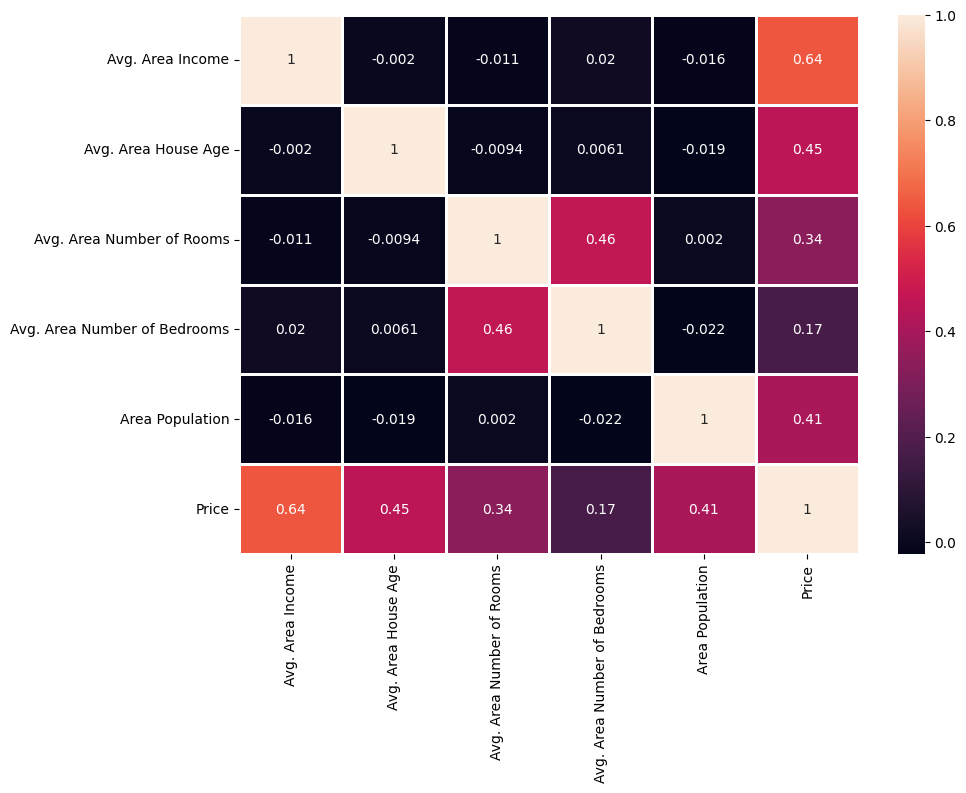

In [8]:
# Menghitung korelasi dari kolom-kolom numerik
corr = df_numeric.corr()
# print(corr)

# Membuat heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, linewidths=2)
plt.show()


In [9]:
l_column = list(df.columns) #making a list out of column names
len_feature = len(l_column) #length of column vector list
l_column

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

In [10]:
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]

print("Feature set size:", X.shape)
print("Variable set size:", y.shape)

Feature set size: (5000, 5)
Variable set size: (5000,)


In [11]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [12]:
# Impor train_test_split
from sklearn.model_selection import train_test_split

# Misalkan kolom target adalah 'Price' dan fitur adalah kolom lainnya
X = df_numeric.drop('Price', axis=1)
y = df_numeric['Price']

# Memisahkan data ke dalam set pelatihan dan pengujian dengan rasio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran set pelatihan dan pengujian
print("Training feature set size:", X_train.shape)
print("Test feature set size:", X_test.shape)
print("Training variable set size:", y_train.shape)
print("Test variable set size:", y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Membuat objek regresi linear
lm = LinearRegression()

# Melatih model dengan data pelatihan
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -2638673.4261902785


In [15]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [2.16257989e+01 1.65590393e+05 1.19827783e+05 2.36109526e+03
 1.52165814e+01]


In [16]:
# Membuat DataFrame untuk koefisien
idict = {'Coefficients': [lm.intercept_]}  # Intersep model
idf = pd.DataFrame(data=idict, index=['Intercept'])

# Membuat DataFrame untuk koefisien fitur
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])

# Menggabungkan DataFrame intersep dan koefisien fitur
cdf = pd.concat([idf, cdf], axis=0)
cdf

,Coefficients
Intercept,-2.638673e+06
Avg. Area Income,2.162580e+01
Avg. Area House Age,1.655904e+05
Avg. Area Number of Rooms,1.198278e+05
Avg. Area Number of Bedrooms,2.361095e+03
Area Population,1.521658e+01


In [17]:
n = X_train.shape[0]
k = X_train.shape[1]
dfN = n - k

# Membuat prediksi pada data pelatihan
train_pred = lm.predict(X_train)

# Menghitung error pada data pelatihan
train_error = np.square(train_pred - y_train)
sum_error = np.sum(train_error)

# Menghitung standar error untuk setiap koefisien
se = [0] * (k + 1)  # Menambahkan satu elemen untuk intersep
for i in range(k):
    r = (sum_error / dfN)
    r = r / np.sum(np.square(X_train.iloc[:, i] - X_train.iloc[:, i].mean()))
    se[i + 1] = np.sqrt(r)

# Menetapkan standar error untuk intersep (bisa diatur ke 0 atau None)
se[0] = None  # atau se[0] = 0

# Menambahkan kolom standar error dan t-statistik ke cdf
cdf['Standard Error'] = se
cdf['t-statistic'] = cdf['Coefficients'] / cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Intercept,-2.638673e+06,NaN,NaN
Avg. Area Income,2.162580e+01,0.159454,135.624094
Avg. Area House Age,1.655904e+05,1733.940193,95.499483
Avg. Area Number of Rooms,1.198278e+05,1697.450899,70.592783
Avg. Area Number of Bedrooms,2.361095e+03,1400.278827,1.686161
Area Population,1.521658e+01,0.172598,88.161794


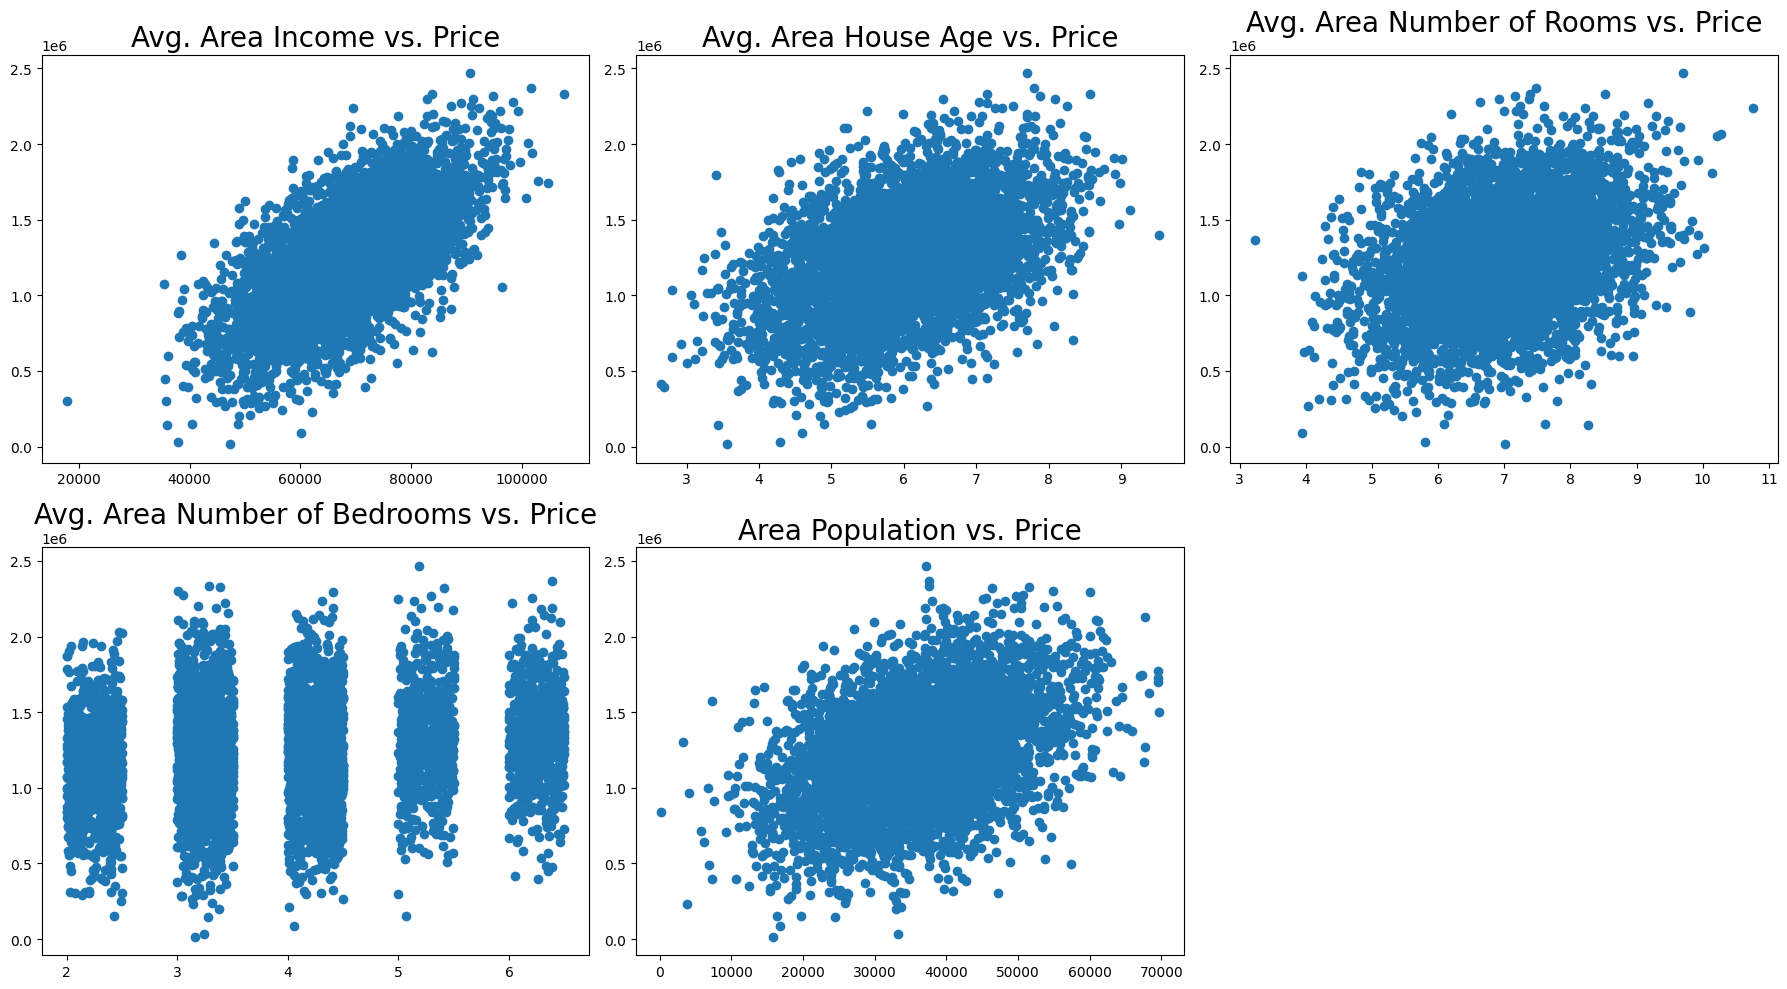

In [18]:
# Buat daftar kolom fitur tanpa 'Intercept'
features = list(cdf.index)
features.remove('Intercept')

from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 3)

# Plot setiap fitur terhadap 'Price'
for i in range(len(features)):
    ax = plt.subplot(gs[i])
    ax.scatter(df[features[i]], df['Price'])
    ax.set_title(features[i] + " vs. Price", fontdict={'fontsize': 20})

plt.tight_layout()
plt.show()

In [19]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


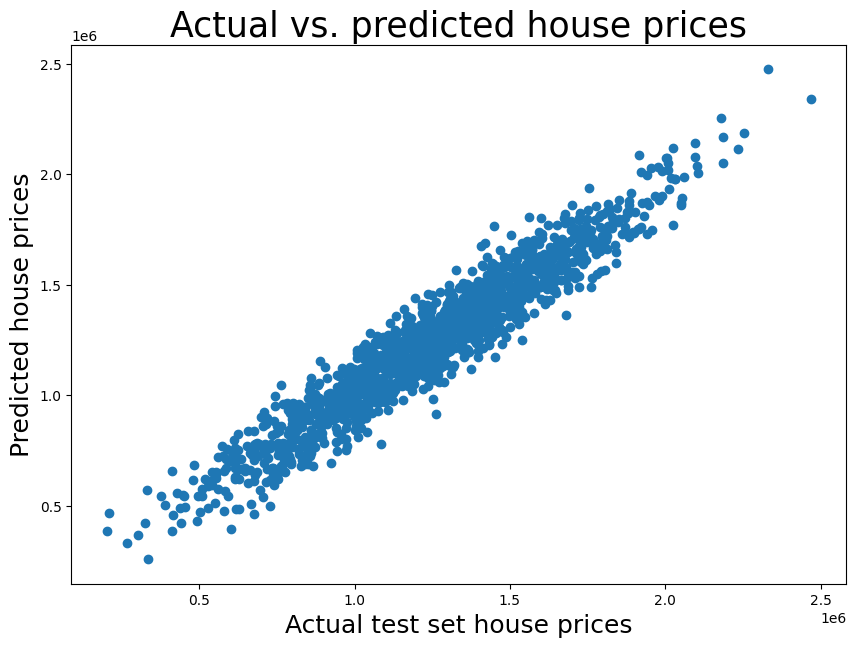

In [20]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices", fontsize=25)
plt.xlabel("Actual test set house prices", fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test, y=predictions)

<ipython-input-21-a4ca1a7785fc>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<Axes: title={'center': 'Histograms of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

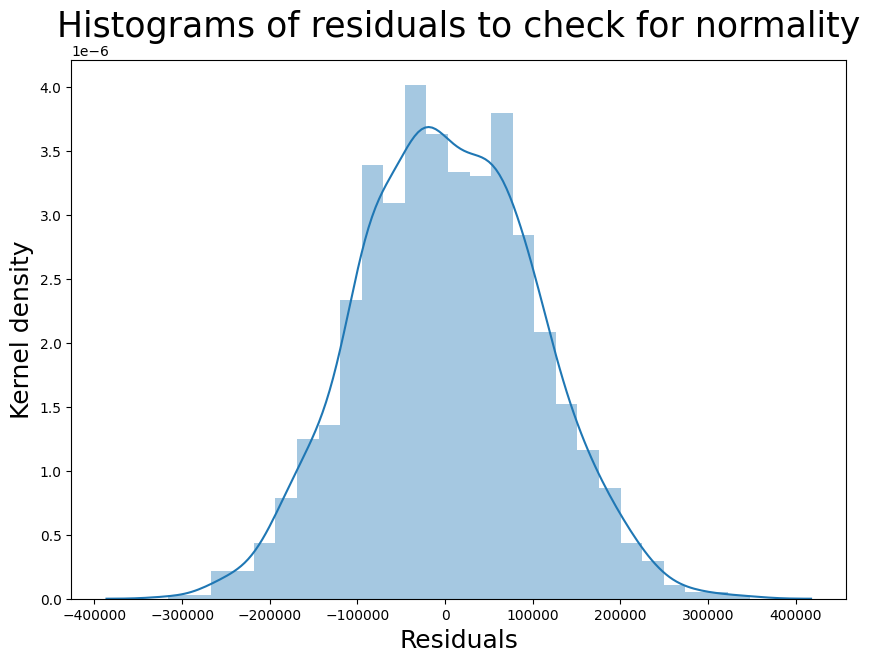

In [21]:
plt.figure(figsize=(10,7))
plt.title("Histograms of residuals to check for normality", fontsize=25)
plt.xlabel("Residuals", fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([y_test-predictions])

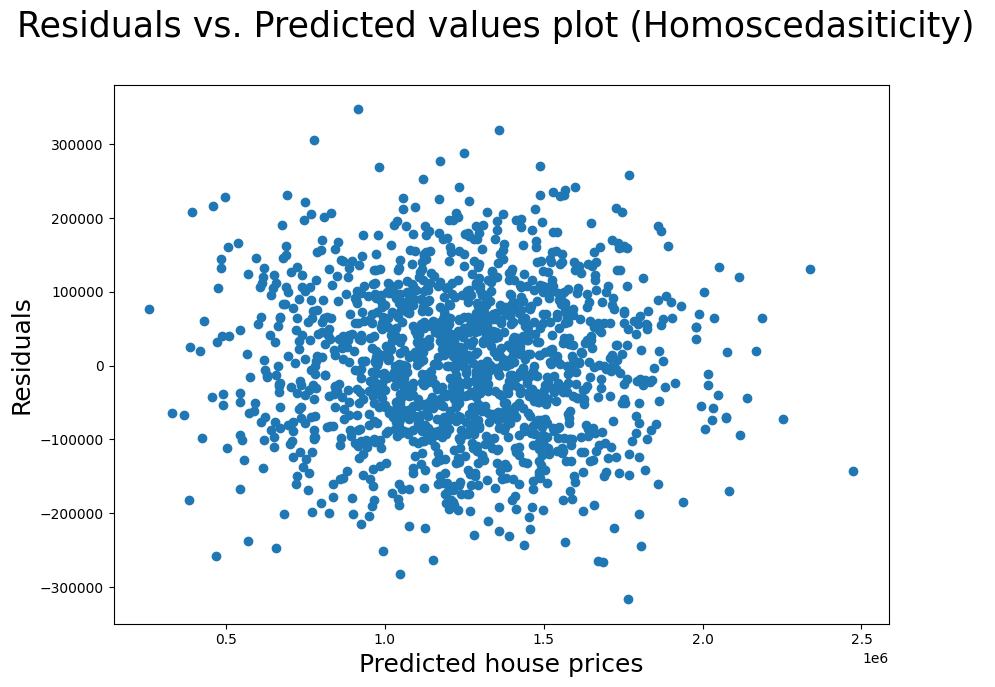

In [22]:

plt.figure(figsize=(10,7))
plt.title("Residuals vs. Predicted values plot (Homoscedasiticity) \n", fontsize=25)
plt.xlabel("Predicted house prices", fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions, y=y_test-predictions)

In [23]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Measn square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 81135.5660933687
Measn square error (MSE): 10068422551.400827
Root mean square error (RMSE): 100341.5295448541
